In [1]:
import pickle
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


from plotting.plot_point_cloud import plot_point_cloud
plt.rcParams["figure.dpi"]=500
plt.rcParams["text.usetex"]=True
%matplotlib inline

In [2]:
def myhist(X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', alpha=1, fill='stepfilled', range=None, label="data"):
  #plt.figure(dpi=100)
  if range==None:
    plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, label=label)
  else:
    plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, range=range, label=label)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid()


In [3]:
def plot_multilayers():
  ax1 = fig.add_subplot(111, projection='3d')
  ax1.plot(np.transpose(np.array(delta_phi[i])), np.transpose(np.array(delta_eta[i])), np.transpose(np.array(delta_z[i])), 'k.', alpha=0.3)
  #Use one less element than bin edges to give rough bin location
  X, Y = np.meshgrid(binedges[0][:-1], binedges[1][:-1])
  
  # Loop over the range of the slice locations
  for ct in [0, 1, 2, 3, 4, 5, 6]:
    cs = ax1.contourf(X, Y, hist[:, :, ct], zdir='z', offset=binedges[2][ct], cmap = plt.cm.RdYlBu_r, alpha=0.5)
  ax1.set_xlim(-0.05,0.15)
  ax1.set_ylim(-0.15,0.15)
  ax1.set_zlim(40,95)
  #plt.axis('equal')
  plt.colorbar(cs)
  plt.show()

In [4]:
def myhist2d(X, Y, bins=8, title='title', xlabel='time(ns)', ylabel='Counnts / bin', cmap=plt.cm.jet, label="data", range=None, weights=None):
  if range==None and np.all(weights==None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins,cmap=cmap, label=label)
  elif range==None and np.all(weights!=None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins,cmap=cmap, label=label, weights=weights)
  elif range!=None and np.all(weihgts==None):
    plt.hist2d(np.array(X), np.array(Y), bins=bins, cmap=cmap, label=label, range=range)
  
  else:
    plt.hist2d(np.array(X), np.array(Y), bins=bins, cmpa=cmap, range=range, label=label, weights=weights)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
      


In [5]:
def scatter3D(X,Y,Z, ax, title="title", xlabel= "barycenter x [cm]", ylabel= "barycenter y [cm]", zlabel="barycenter z [cm]", color='blue', alpha=1):
  ax.scatter(X,Y,Z, color=color, alpha=alpha, marker='.', s=1)

In [8]:
#filename = 'histo_SinglePi0PU_pT20to200_eta17to27.root'
#filename = 'histo_SinglePi_correctLinks.root'
filename = 'histo_4Pions_0PU_pt10to100_eta17to27.root'
file = uproot.open(filename)

In [9]:
clusters = file["ticlDumper/clusters"]
tracksters = file["ticlDumper/tracksters"]
linkedTracksters = file["ticlDumper/linkedTracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
TICLCandidate = file["ticlDumper/candidates"]


simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]


In [ ]:
clusters.keys()


In [10]:
simTICLCandidate_simTracksterCPIndex = simTICLCandidate["simTICLCandidate_simTracksterCPIndex"].array()
simTICLCandidate_pdgId = simTICLCandidate["simTICLCandidate_pdgId"].array()
simTICLCandidate_charge = simTICLCandidate["simTICLCandidate_charge"].array()

In [11]:

track_pt = tracks["track_pt"].array()
track_id = tracks["track_id"].array()
track_hgcal_eta = tracks["track_hgcal_eta"].array()
track_hgcal_phi = tracks["track_hgcal_phi"].array()
track_hgcal_z = tracks["track_hgcal_z"].array()
track_hgcal_pt = tracks["track_hgcal_pt"].array()
track_missing_outer_hits = tracks["track_missing_outer_hits"].array()
track_missing_inner_hits = tracks["track_missing_inner_hits"].array()
track_nhits = tracks["track_nhits"].array()
track_quality = tracks["track_quality"].array()
track_time_mtd_err = tracks["track_time_mtd_err"].array()
track_isMuon = tracks["track_isMuon"].array()
track_isTrackerMuon = tracks["track_isTrackerMuon"].array()

In [12]:
track_boundaryX = simtrackstersSC["track_boundaryX"].array()
track_boundaryY = simtrackstersSC["track_boundaryY"].array()
track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

simTICLCandidate_time = simTICLCandidate["simTICLCandidate_time"].array()
simTICLCandidate_raw_energy = simTICLCandidate["simTICLCandidate_raw_energy"].array()
simTICLCandidate_regressed_energy = simTICLCandidate["simTICLCandidate_regressed_energy"].array()
simTICLCandidate_track_in_candidate = simTICLCandidate["simTICLCandidate_track_in_candidate"].array()

In [27]:
simTICLCandidate.keys()

['simTICLCandidate_raw_energy',
 'simTICLCandidate_regressed_energy',
 'simTICLCandidate_simTracksterCPIndex',
 'simTICLCandidate_boundaryX',
 'simTICLCandidate_boundaryY',
 'simTICLCandidate_boundaryZ',
 'simTICLCandidate_boundaryPx',
 'simTICLCandidate_boundaryPy',
 'simTICLCandidate_boundaryPz',
 'simTICLCandidate_time',
 'simTICLCandidate_caloParticleMass',
 'simTICLCandidate_pdgId',
 'simTICLCandidate_charge',
 'simTICLCandidate_track_in_candidate']

In [13]:
candidate_pdgId = TICLCandidate["candidate_pdgId"].array()
candidate_id_prob = TICLCandidate["candidate_id_probabilities"].array()
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate = TICLCandidate["track_in_candidate"].array()
candidate_energy = TICLCandidate["candidate_energy"].array()
candidate_raw_energy = TICLCandidate["candidate_raw_energy"].array()
candidate_time = TICLCandidate["candidate_time"].array()
candidate_timeErr = TICLCandidate["candidate_timeErr"].array()
NCandidates = TICLCandidate["NCandidates"]
trackstersMerged_rawEne = trackstersMerged["raw_energy"].array()

tsL_in_cand = TICLCandidate["trackstersLinked_in_candidate"].array()

In [ ]:
print(tsL_in_cand[0])

In [14]:
ntrackstersMerged = trackstersMerged["NTrackstersMerged"]
bxM = trackstersMerged["barycenter_x"].array()
byM = trackstersMerged["barycenter_y"].array()
bzM = trackstersMerged["barycenter_z"].array()
tErr = trackstersMerged["timeError"].array()
betaM = trackstersMerged["barycenter_eta"].array()
bphiM = trackstersMerged["barycenter_phi"].array()
reg_enM = trackstersMerged["regressed_energy"].array() 

bx = tracksters["barycenter_x"].array()
by = tracksters["barycenter_y"].array()
bz = tracksters["barycenter_z"].array()

In [ ]:
print(bxM[0])

In [15]:
ntracksters = tracksters["NTracksters"].array()
print(f"sum(ntracksters): {sum(ntracksters)}")
print(f"sum(NCandidates): {sum(NCandidates)}")

sum(ntracksters): 85818
sum(NCandidates): 0


In [16]:
recoToSim_en = associations["Mergetracksters_recoToSim_CP_sharedE"].array()
recoToSim_score = associations["Mergetracksters_recoToSim_CP_score"].array()
recoToSim_index = associations["Mergetracksters_recoToSim_CP"].array()

simToReco_en = associations["Mergetracksters_simToReco_CP_sharedE"].array()
simToReco_score = associations["Mergetracksters_simToReco_CP_score"].array()
simToReco_index = associations["Mergetracksters_simToReco_CP"].array()

simToRecoPU_en = associations["Mergetracksters_simToReco_PU_sharedE"].array()
simToRecoPU_score = associations["Mergetracksters_simToReco_PU_score"].array()
simToRecoPU_index = associations["Mergetracksters_simToReco_PU"].array()

recoToSimPU_en = associations["Mergetracksters_recoToSim_PU_sharedE"].array()
recoToSimPU_score = associations["Mergetracksters_recoToSim_PU_score"].array()
recoToSimPU_index = associations["Mergetracksters_recoToSim_PU"].array()

In [ ]:
print(ak.max(recoToSim_score))

In [17]:
SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()
SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_boundary_time = simtrackstersSC["timeBoundary"].array()
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_timeErr = simtrackstersSC["timeError"].array()
SC_trackIdx = simtrackstersSC["trackIdx"].array()

In [18]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()
CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()


In [19]:
indices_linkedTracksters = linkedTracksters["clue3Dts_indices"].array()
print(indices_linkedTracksters)
print(len(indices_linkedTracksters))

#print(indices_linkedTracksters.type)
# Check to see if the indices are consitent with the number of tracksters in every event

for i, mTs in enumerate(indices_linkedTracksters): #loop over the events
  print(f"Event {i}")
  #print(f"tracksters[{i}]: {tracksters[i]}")
  print(f"len(tracksters['time'].array()[{i}]: {len(tracksters['time'].array()[i])}")
  for j in mTs: #loop over the mergedTracksters
    print(j)
  

[[[0], [1], [2], [3], [4, 7, 18, 8, ... [86, 70, 74, 79, 65, 67], [87], [88], [89]]]
1000
Event 0
len(tracksters['time'].array()[0]: 30
[0]
[1]
[2]
[3]
[4, 7, 18, 8, 9, 19, 17]
[5]
[6]
[10, 13, 22, 14, 23, 12, 11]
[15]
[16]
[20]
[21]
[24]
[25]
[26]
[27]
[28]
[29]
Event 1
len(tracksters['time'].array()[1]: 77
[0, 40, 28, 42]
[1]
[4, 8, 2, 26, 11, 6, 35, 12, 13]
[7, 5, 10, 41, 21, 19, 3, 9, 20]
[14]
[15]
[16]
[17]
[18]
[22]
[23]
[24]
[25]
[27]
[29]
[30]
[31]
[32]
[33]
[34]
[36]
[37]
[38]
[39]
[43]
[44]
[45]
[46]
[47]
[49]
[50, 65, 61, 71]
[51, 68, 74, 48, 56]
[52]
[53]
[54]
[55]
[57]
[58]
[59]
[60]
[62]
[63]
[64]
[66]
[67]
[69]
[70]
[72]
[73]
[75]
[76]
Event 2
len(tracksters['time'].array()[2]: 40
[0, 2, 23, 6]
[1]
[3]
[4]
[5]
[7]
[8]
[9, 12, 30]
[10, 31, 37, 26, 13, 36, 39, 33, 32, 35, 29]
[11]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[24]
[25]
[27]
[28]
[34]
[38]
Event 3
len(tracksters['time'].array()[3]: 98
[2, 8, 6, 17, 1, 0, 24, 25, 32, 9, 3]
[4]
[5]
[7]
[14, 53, 55, 16, 52, 90,

len(tracksters['time'].array()[140]: 93
[2, 3, 0, 14, 5, 15, 1, 4]
[7]
[8]
[10, 51, 12, 47, 13, 49, 11, 48]
[16]
[17]
[18]
[20]
[21]
[22]
[24]
[25]
[26]
[28]
[29]
[30]
[31]
[32]
[35, 42, 40, 6, 9, 27, 34, 36, 19, 43, 33]
[37]
[38, 23, 39]
[41]
[44]
[45]
[46]
[50]
[52]
[53]
[54]
[55, 72, 67, 79, 70]
[56]
[57]
[58, 74, 68, 80, 91, 65, 75]
[59]
[60]
[61]
[62]
[63]
[64, 73]
[66, 84]
[69]
[71]
[76]
[77]
[78]
[83]
[85]
[86]
[87]
[88]
[90, 89, 81, 82]
[92]
Event 141
len(tracksters['time'].array()[141]: 62
[1, 4, 0, 27, 2, 29, 3, 23]
[5]
[7]
[8]
[11]
[14, 16, 13]
[15]
[17, 21, 12]
[18, 9, 10]
[19]
[20]
[22]
[24]
[25]
[26]
[28]
[31, 37, 30, 6]
[32]
[33]
[34]
[35]
[36]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[46]
[47]
[48, 53, 58, 52, 45, 54]
[49]
[50]
[51]
[55]
[56, 59]
[57, 60]
[61]
Event 142
len(tracksters['time'].array()[142]: 52
[2]
[3]
[4]
[5, 1, 16, 12, 15, 9, 18, 17, 11, 10, 0]
[6]
[7, 32, 13]
[8]
[14]
[19, 41, 42, 27, 20, 24]
[21, 25, 22, 26, 28, 23, 40]
[30]
[31]
[33]
[34]
[35]
[36]
[37]
[3

len(tracksters['time'].array()[309]: 187
[2]
[4, 21, 76, 28, 77, 87, 65, 79, 96, 91, 86, 102, 0]
[5, 67, 14, 7, 24, 11, 16, 57, 1, 83, 114, ... 19, 110, 13, 8, 18, 58, 62, 15, 6, 12]
[9]
[17]
[22]
[23]
[25]
[26]
[27]
[31]
[33, 40, 35, 55, 46, 34, 49, 133, 149, ... 180, 135, 170, 54, 50, 122, 32, 39, 45]
[37, 155, 47, 42, 36, 48, 148, 161, 147, ... 164, 56, 142, 130, 38, 141, 52, 131]
[41]
[43]
[44]
[51]
[59]
[60]
[61]
[63]
[64]
[68]
[69]
[71]
[72]
[73]
[74, 82, 81, 66, 89, 3, 30, 88, 29, 80]
[75]
[78]
[84]
[85, 70, 20]
[90]
[92]
[93]
[94]
[95]
[97]
[98]
[99]
[100]
[101]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[111]
[112]
[113]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[136]
[137]
[138]
[139]
[140]
[143]
[144, 53, 165]
[145]
[146]
[151]
[152]
[153]
[154]
[156]
[157]
[158, 177, 176, 159, 163, 169, 162]
[160]
[166]
[167]
[168]
[172]
[173]
[174]
[175]
[178]
[179]
[181]
[182]
[184]
[185]
[186]
Event 310
len(tracksters['time'].array()[310]: 98
[0, 

len(tracksters['time'].array()[341]: 132
[0, 83, 17, 76, 12, 18, 61, 86, 60, 64, 84, 8, 63]
[2, 16, 55, 10, 77, 72, 1, 9, 54, 4, 66, ... 88, 67, 15, 79, 89, 80, 85, 5, 81, 3, 7]
[6]
[11]
[14, 57, 68]
[20, 30]
[22, 118, 48, 126, 43, 50, 49, 128, 114, 38, 40, 36]
[23, 44]
[24]
[26]
[27, 28, 53, 115, 127, 111]
[31, 25, 34, 29, 19, 117, 112, 21]
[32]
[33]
[35]
[39, 37, 46, 45]
[41]
[42, 125, 121, 106]
[47]
[51]
[52, 109]
[56]
[58]
[59]
[62]
[65]
[69]
[70]
[71]
[73]
[75]
[82]
[87]
[90]
[91]
[92]
[93]
[94]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[107]
[108]
[110]
[113]
[116]
[119]
[120]
[122]
[123]
[124]
[129]
[130]
[131]
Event 342
len(tracksters['time'].array()[342]: 66
[1]
[2]
[3]
[5]
[7, 8, 4, 0, 6]
[9, 23, 11, 22, 10, 24]
[12, 16, 51, 15, 18, 48, 52, 50, 46, 42, 45, 64, 17, 40, 39, 20]
[13, 14]
[19]
[21]
[25, 26]
[27]
[28, 29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[41]
[43]
[44]
[47]
[49]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[65]
Event 343
len(tra

len(tracksters['time'].array()[377]: 79
[0, 1, 3, 4, 35, 15, 25, 24, 27, 2, 44]
[5, 71, 9, 8, 70, 62, 12, 10, 6, 61, 46]
[7]
[11]
[14]
[16]
[17, 36]
[19]
[20]
[21]
[22, 32, 26, 33, 38, 30]
[23]
[28]
[29]
[31]
[34, 18]
[37]
[40]
[41]
[42, 39]
[43]
[45]
[47]
[48]
[49]
[50]
[51]
[52, 55, 13, 59, 64, 67, 57, 68, 75]
[53]
[54]
[56]
[58]
[60]
[63]
[65]
[66]
[69]
[72]
[73]
[74]
[76]
[77]
[78]
Event 378
len(tracksters['time'].array()[378]: 72
[0]
[2, 7]
[3]
[4, 19, 1]
[5, 17, 6]
[9]
[10, 44, 43, 8, 14, 13, 45, 52, 12]
[11]
[15]
[16]
[18]
[21]
[22]
[23, 27]
[24, 35, 31, 20, 28]
[25, 34, 32, 26]
[29, 41]
[30]
[33]
[36]
[37]
[38]
[39]
[40]
[42]
[46]
[48]
[49]
[50]
[51, 47, 71, 54, 57, 65, 53, 59, 58]
[55, 64]
[56]
[60]
[62]
[66]
[67]
[68, 63, 61]
[69]
[70]
Event 379
len(tracksters['time'].array()[379]: 90
[0, 21, 1, 43, 39, 33, 48, 40, 2, 52, 3, 7, 37, 5, 4, 6]
[12, 11, 14, 10, 20, 74, 73, 76, 77, 81, 89, 15, 16, 75]
[13, 8, 84, 9]
[17, 79]
[18]
[19]
[22]
[23]
[25, 38, 62, 31]
[26]
[30, 29, 69, 4

len(tracksters['time'].array()[412]: 25
[2, 18, 6]
[4, 7, 5, 3]
[8]
[10]
[11]
[12, 0, 1, 9]
[13]
[14]
[15]
[16]
[17]
[19]
[20]
[21]
[22]
[23]
[24]
Event 413
len(tracksters['time'].array()[413]: 84
[2, 7, 5, 16, 18]
[4, 8, 13, 9, 11, 3, 10, 17, 0, 1]
[12]
[14, 6]
[15, 29, 26, 35, 41, 31, 37, 34]
[21]
[22]
[23]
[24]
[25]
[27]
[28]
[30]
[32]
[33]
[38]
[39]
[40, 43]
[42, 36]
[44]
[45]
[46]
[48]
[50]
[51]
[53]
[55]
[61]
[62]
[64, 82, 47, 49, 19, 58, 20, 52, 57, 56]
[65]
[66, 73]
[67]
[68, 75, 54, 78, 60, 63]
[69]
[70, 76, 59, 72]
[71]
[74]
[77]
[79]
[80]
[81]
[83]
Event 414
len(tracksters['time'].array()[414]: 94
[0, 1, 2, 3, 8]
[5, 6]
[7]
[11]
[13, 21]
[14, 41]
[16]
[17]
[19]
[26]
[27, 9, 10, 4, 15, 12, 22, 39, 23, 18]
[29]
[30]
[31, 24, 25, 37]
[33]
[34]
[36, 28, 32, 35, 20]
[38]
[40]
[42]
[43]
[44]
[48]
[50, 83, 57, 55, 64]
[54, 46, 79, 45, 86, 51, 77, 73, 49, 47, 72, 82]
[58]
[59]
[60, 56, 67, 71]
[62]
[63]
[65]
[66]
[68]
[69]
[70, 52, 61]
[74]
[76]
[78, 75, 53, 87, 90, 80, 92]
[81]
[84

len(tracksters['time'].array()[446]: 99
[1]
[2]
[4]
[5]
[6, 8, 48, 3, 13, 11, 16, 18, 24, 44, 10, 7]
[12]
[15]
[20, 42, 23, 14, 0, 9, 21, 17, 22, 41, 19, 38]
[26, 35, 76, 27, 32, 80, 33, 28]
[29]
[30]
[31]
[34]
[37]
[39]
[40]
[43, 47]
[45]
[46]
[49, 53, 25, 54]
[50]
[51]
[55]
[56]
[58]
[59, 52, 57]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74, 83, 95, 89, 85, 36, 86, 82, 78, 84]
[75, 88]
[77]
[79]
[81]
[87]
[90]
[91]
[92]
[93]
[94]
[96]
[97]
[98]
Event 447
len(tracksters['time'].array()[447]: 68
[0]
[1, 12, 2, 3, 14, 5, 15]
[4, 6, 21, 18]
[7, 43, 33, 37, 9, 31, 38]
[8]
[16]
[17]
[19]
[20, 13]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[32]
[34]
[35]
[36]
[39]
[40, 10, 62, 48, 57, 41, 53, 58]
[42]
[44]
[45, 55]
[46]
[49]
[50]
[51, 11]
[52]
[56]
[59, 47, 63, 54]
[60]
[61]
[64]
[65]
[66]
[67]
Event 448
len(tracksters['time'].array()[448]: 56
[0, 5, 1, 22]
[2]
[3]
[4]
[11, 15, 10, 52, 51, 7, 14, 13, 9, 17]
[12]
[18, 47, 50, 44, 8, 48, 16, 43]
[19]
[20]
[21]
[

len(tracksters['time'].array()[481]: 146
[3]
[5]
[7]
[9, 63, 21, 44, 95, 82, 102, 105, 101, 108, 79, 103, 51, 56, 18, 49]
[13]
[14, 15, 43, 6, 1, 11, 10, 20, 0, 59, 76, 46, 64, 40, 8, 19, 61, 12]
[16]
[17]
[22, 42, 81, 94, 53]
[23]
[25]
[26, 27, 33, 31, 32, 36, 117, 116, 132, 35, 24, 115, 112, 30, 29, 34]
[28]
[38]
[39]
[41]
[45]
[47, 54, 2, 4, 37]
[52]
[57]
[58]
[62, 55, 60, 75, 48, 88]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[77]
[78]
[80]
[83]
[84]
[85]
[86, 99, 50]
[87]
[89]
[90]
[91]
[92]
[93]
[96]
[97]
[98]
[100]
[104]
[106]
[107]
[109]
[110]
[111]
[113]
[114]
[119]
[120, 124, 126, 118, 143, 128, 131, 136, 122, 142, 123]
[121, 133]
[125]
[127]
[129]
[130]
[134]
[135]
[137]
[139, 138, 141]
[140]
[144]
[145]
Event 482
len(tracksters['time'].array()[482]: 93
[2, 4, 1, 11, 0, 6]
[3, 7, 29, 47, 31, 30, 27, 41, 39, 38, 36, 12, 28, 43, 13, 54, 24]
[5]
[8, 35]
[9]
[10]
[16, 62, 14, 21, 70, 79, 60, 80, 73, 74, 77, 84, 81, 15, 18, 20, 17]
[19]
[22]
[23]
[25]
[26]
[34]
[37, 33, 32

len(tracksters['time'].array()[515]: 69
[0]
[1]
[3, 60, 10, 13, 11, 4]
[5]
[6]
[7]
[8]
[9]
[12]
[14]
[15]
[16]
[17]
[18]
[19]
[20, 30, 32, 2]
[23]
[25]
[26]
[27]
[33]
[34, 36, 31, 22, 21, 28, 29, 24, 37]
[35]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[48]
[49]
[51]
[53, 64]
[54]
[55, 47, 63, 58, 61, 65, 50, 56, 52]
[57]
[59]
[62]
[66]
[67]
[68]
Event 516
len(tracksters['time'].array()[516]: 171
[1, 68, 11, 0, 119, 3, 83, 91, 100, 90, 69, 101, 84, 14, 98, 96, 4]
[2, 62, 6, 9, 70, 64, 66, 61, 80, 81, 12, 5, 7, 56, 10, 13]
[8]
[17, 20, 16, 42, 29]
[18]
[19, 137, 38, 35, 133, 23, 41, 48, 53, ... 47, 138, 142, 158, 165, 162, 169, 31, 39]
[21]
[22]
[24, 25]
[26]
[27, 32, 28, 15]
[33]
[34, 30]
[36]
[37]
[40]
[43]
[44, 54, 143, 131]
[50]
[51]
[52]
[55]
[58]
[59]
[60]
[63, 77]
[67]
[71]
[72, 57, 79]
[73]
[74]
[75, 103, 85, 65]
[76]
[78]
[82]
[86]
[87]
[88]
[89]
[92]
[93]
[94]
[95]
[97]
[99]
[102]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[120, 

len(tracksters['time'].array()[546]: 95
[0, 7, 3, 6, 34, 4, 1, 2]
[5, 33, 10, 28, 38, 9, 32, 43, 8]
[12, 55, 16, 86, 15, 25, 62, 63, 71, 11, 13, 18, 19]
[14]
[17, 69, 68, 65, 24, 21, 76, 77, 82, 94, 20, 59, 22, 23]
[26]
[27]
[30, 37]
[31]
[36]
[41]
[42]
[44, 29, 45]
[46]
[47]
[48]
[49, 35, 51, 50, 40, 39]
[52]
[53]
[54]
[56]
[57]
[58]
[60]
[64]
[66]
[67, 87, 61, 75]
[70]
[72]
[73]
[74]
[78]
[79]
[80]
[81]
[83]
[84]
[85]
[88]
[89]
[90]
[91]
[92]
[93]
Event 547
len(tracksters['time'].array()[547]: 115
[1, 2, 5, 64, 7, 0, 11]
[3, 50]
[4, 8, 6, 15, 66, 56, 54, 61, 57, 13, 53, 49, 10, 55, 70, 72, 69, 14, 9, 12]
[16]
[17]
[19]
[22, 42, 41]
[24, 74, 20, 38]
[26, 27, 81, 39, 40, 31, 21, 77, 25, 96, ... 93, 44, 45, 37, 35, 18, 23, 28, 34, 73]
[29, 83]
[30]
[32]
[33]
[36]
[43]
[46]
[47]
[51]
[52]
[58]
[59]
[60]
[62]
[63]
[65]
[67]
[68]
[71]
[75]
[76]
[78]
[79]
[80]
[82]
[84, 91, 86, 88, 48, 111, 101, 102, 90, 105]
[85]
[89]
[95]
[97]
[98]
[99]
[100]
[104]
[107]
[108]
[109]
Event 548
len(trackste

len(tracksters['time'].array()[579]: 126
[0, 15, 1, 9, 8, 81, 73, 2, 77, 74, 90, 20, 82, 89, 83, 10]
[3, 5, 17, 72, 16, 4, 18, 71, 14, 6, 13, 12, 11, 67]
[7]
[19]
[22]
[25]
[29, 100]
[30, 27, 28]
[32]
[33, 94]
[34, 96, 47, 52, 23]
[37, 117, 63, 42, 41, 36, 106, 21, 40, 55, ... 111, 24, 102, 39, 95, 53, 62, 104, 35]
[44, 43, 51, 107, 65, 50, 124, 123, 57, 56, 59, 58]
[49]
[54, 48, 119, 116, 66, 109]
[60, 26, 61]
[64]
[68]
[69]
[70]
[75]
[76]
[79]
[80, 78, 91]
[84]
[86]
[87, 85]
[88]
[92]
[93]
[97]
[98]
[99]
[101]
[103]
[105]
[108]
[110]
[112]
[113]
[114]
[115]
[118]
[120]
[121]
[122]
[125]
Event 580
len(tracksters['time'].array()[580]: 87
[1]
[2]
[3]
[4]
[5]
[7, 8, 12, 16, 15, 6, 61]
[11, 19, 75, 13, 76, 82, 20, 79, 81, 72, 78, 63, 17, 14, 64, 9, 18, 60]
[21]
[23]
[26]
[27, 37, 34, 42, 48]
[28]
[29]
[30]
[31]
[32]
[33]
[35]
[36]
[38, 46, 47, 0, 22, 25, 24, 53, 39, 49, 44, 45]
[40]
[41]
[43]
[50]
[51]
[52]
[54]
[55]
[56]
[57]
[58]
[62]
[65, 73, 59, 10, 77, 69]
[66]
[67]
[68]
[70]
[74, 80

len(tracksters['time'].array()[614]: 85
[2, 3, 16, 0, 10, 4, 52, 6, 9, 13, 8]
[5, 1, 39, 12]
[7]
[11]
[14]
[15]
[17]
[18]
[19]
[20, 33, 57, 63, 70, 32, 67, 34, 82, 27, ... 68, 81, 74, 79, 73, 24, 62, 21, 23, 28]
[22, 64, 31, 77, 30, 35, 36, 37]
[25]
[29]
[38]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[53]
[54]
[55]
[56]
[58]
[59]
[60]
[65]
[66]
[69]
[71]
[72]
[75]
[76]
[80]
[83]
[84]
Event 615
len(tracksters['time'].array()[615]: 54
[0]
[1]
[3, 35, 11, 41, 8, 6, 4, 2, 32, 10, 25]
[5, 23]
[7]
[13, 47, 14, 16, 18, 12, 21, 48, 15]
[17, 49, 20]
[19]
[22]
[24]
[26]
[27]
[28]
[29]
[30]
[31]
[33]
[34]
[36]
[37]
[38]
[40]
[42]
[43, 44, 39, 9]
[45]
[46]
[50]
[51]
[52]
[53]
Event 616
len(tracksters['time'].array()[616]: 31
[0, 1, 12]
[2, 3]
[4]
[5]
[6, 7, 8, 9]
[10]
[11]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
Event 617
len(tracksters['time'].array()[617]: 44
[1]
[2, 6, 4, 12, 5, 17, 7, 10, 3, 11, 0]
[8]
[9]
[14, 13]
[15]
[16]
[

len(tracksters['time'].array()[649]: 71
[1, 0, 16, 6, 21, 31, 26, 10, 35, 19, 36, 8, 33, 9, 22, 30, 17, 11, 4, 7, 2]
[3, 18, 5]
[12]
[13]
[14, 39, 40, 15]
[20]
[23, 34]
[24]
[25]
[27]
[28]
[29]
[32]
[37]
[38]
[41]
[42]
[43]
[45, 51, 67, 60, 50, 55, 44, 52, 68, 54]
[46]
[47]
[48]
[53]
[56, 49, 57]
[58]
[59]
[61]
[62]
[63, 65, 69, 64]
[66]
[70]
Event 650
len(tracksters['time'].array()[650]: 50
[1, 0, 2, 3]
[4]
[6, 21, 20, 17, 5, 11]
[8]
[9]
[10]
[12]
[13, 7]
[14, 19, 16, 15]
[18]
[23, 22, 28, 26, 33, 34, 25, 27, 32]
[24]
[29]
[30]
[31]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
Event 651
len(tracksters['time'].array()[651]: 116
[0, 30, 1, 3, 7, 42, 57, 59, 37, 50, 53, 33, 51, 6, 26]
[4]
[5, 32, 2, 48, 44, 27, 29, 35, 36]
[9, 85, 11, 23, 14, 15, 16, 87, 21, 106, ... 18, 90, 96, 95, 20, 13, 12, 10, 17, 8]
[19]
[22]
[24]
[28]
[31]
[34]
[38]
[39]
[40]
[41]
[45]
[46]
[47]
[49]
[52]
[54]
[55]
[56, 43]
[58]
[60, 63, 69, 67]
[61]
[62]
[65]
[68, 71, 66, 64]
[70]
[7

len(tracksters['time'].array()[682]: 64
[0, 2]
[1, 5, 3, 6, 4, 27, 7, 10, 8, 39, 9, 42]
[11, 20, 18, 53, 48, 60, 51, 54, 58, 52, 21, 61, 26, 24, 14, 25, 22, 12, 44, 17]
[15, 13]
[16]
[19]
[23]
[28]
[29]
[30, 32, 31, 40]
[33]
[37, 35, 34, 36, 38]
[41]
[43]
[45]
[46]
[47]
[49]
[50]
[55]
[56]
[57]
[59]
[62]
[63]
Event 683
len(tracksters['time'].array()[683]: 118
[0, 7, 17, 44, 13, 14, 48, 53, 67, 47, 64, 52, 2, 8, 5, 43]
[3, 11, 6, 10, 40, 1, 51, 9, 57, 19, 20, 4]
[12]
[15]
[16]
[18]
[21]
[22]
[23]
[24]
[25, 37, 70, 78, 35, 26, 34]
[27, 33]
[28, 82, 39]
[29]
[30]
[31]
[32]
[36]
[38]
[41]
[42]
[45]
[46]
[49]
[50]
[54]
[55]
[56]
[58]
[59]
[60]
[61]
[62]
[63]
[65]
[66]
[68]
[69]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[79]
[80]
[81]
[83]
[84, 115, 116, 87, 108, 114, 97, 103, 85, 93]
[88, 117, 107, 112, 96]
[89]
[90, 86]
[91]
[92]
[94]
[95]
[98]
[99]
[100]
[101]
[102]
[104]
[105]
[106]
[109]
[110]
[111]
[113]
Event 684
len(tracksters['time'].array()[684]: 96
[0, 39, 2, 29, 1, 5, 37, 7, 28, 24]
[3,

len(tracksters['time'].array()[715]: 108
[0, 11, 39, 50, 56, 55, 52, 51, 53, 57, 41, 1, 5]
[2, 7, 6, 4, 46, 10]
[3]
[8]
[14]
[15, 18, 13, 21, 73, 22, 35, 24, 25, 26, ... 71, 17, 20, 95, 65, 19, 29, 82, 32, 16]
[23]
[27]
[28]
[31]
[33]
[34]
[37]
[38]
[42]
[43]
[44]
[45, 36, 40, 9, 12]
[47]
[48]
[54]
[59]
[63]
[64, 60, 58, 49, 62, 61]
[66]
[67]
[68]
[69]
[72]
[76]
[79]
[80, 103, 102]
[81]
[83, 77, 78, 84, 87, 100, 88, 75, 94, 86, 90]
[85]
[89]
[91]
[92]
[93]
[96]
[97]
[98]
[99]
[101]
[104]
[105]
[106]
[107]
Event 716
len(tracksters['time'].array()[716]: 39
[0]
[1]
[5, 17, 6, 2, 3, 4]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[18]
[19]
[20]
[23]
[24]
[25]
[27]
[28, 26, 29, 30, 22, 35, 38, 21, 34, 31]
[32]
[33]
[36]
[37]
Event 717
len(tracksters['time'].array()[717]: 14
[0]
[1]
[3]
[4]
[5]
[7]
[8]
[9, 11, 2, 6]
[10]
[12]
[13]
Event 718
len(tracksters['time'].array()[718]: 95
[1, 2, 3, 0, 24, 19, 16, 20, 36, 34, 44, 14, 5]
[4]
[7, 61, 9, 80, 62, 8, 12, 46]
[10]
[11]
[13]
[15]
[17]
[21]

len(tracksters['time'].array()[747]: 139
[6, 9]
[8]
[10]
[11, 7, 21, 24, 19, 105, 112, 25, 22]
[12, 96, 97]
[13, 93]
[14, 15, 113, 23, 101, 103, 26, 102, 107]
[16]
[17, 104]
[18]
[20]
[28]
[30]
[31, 3, 0, 1, 47, 48, 34, 2, 29, 37]
[32]
[40]
[41]
[42, 44, 4, 38]
[43]
[49]
[50, 67, 69, 33, 5, 86, 76, 59, 62]
[51]
[52]
[53]
[54, 64, 45]
[55]
[57, 61]
[58, 56, 39]
[60]
[63]
[65]
[66]
[68]
[71, 46, 35, 36, 70]
[72]
[73]
[74]
[75]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[87]
[88]
[89]
[90]
[91]
[92]
[94]
[95]
[98]
[99, 27]
[100]
[106]
[109, 110, 129, 108, 117, 116, 130, 118, 124, 111, 127, 122]
[114]
[115]
[119]
[120]
[121]
[123]
[125]
[126]
[128]
[131]
[132, 137]
[133]
[134]
[135]
[136]
[138]
Event 748
len(tracksters['time'].array()[748]: 63
[0, 26, 2, 23]
[3]
[4]
[5]
[6]
[7]
[8]
[10]
[12]
[13]
[14]
[15, 11]
[16, 9, 17]
[18]
[20]
[22, 32, 35, 1, 48, 25, 33, 41, 21]
[27, 39]
[28]
[31]
[34, 30]
[37, 36]
[38]
[40]
[42, 24, 29]
[43]
[44]
[45]
[46]
[47]
[49]
[50]
[51]
[52]
[54]
[55]
[56]
[5

len(tracksters['time'].array()[783]: 57
[0]
[1]
[3]
[5, 28]
[6, 26]
[7, 32, 4, 2, 25]
[8, 18, 10, 17, 30, 9, 11]
[12]
[13]
[14, 34]
[15, 36]
[16]
[19]
[20, 22, 21]
[23]
[24]
[27]
[29]
[31]
[33]
[35]
[37]
[38]
[39]
[40]
[41]
[42]
[44, 54, 53, 51, 52, 43, 49]
[45]
[46]
[47]
[48, 50]
[55]
[56]
Event 784
len(tracksters['time'].array()[784]: 87
[2]
[3, 8, 6, 7, 44, 13, 1, 12, 19, 23, 53, 26, 16, 18, 51, 55, 45, 10, 0]
[4]
[9, 5, 11, 58]
[14]
[15]
[17]
[21, 28, 20, 22, 27, 48]
[24]
[25]
[31, 30]
[33, 32, 43]
[34, 70, 38, 36, 39, 37, 77, 76, 83, 82, 74, 73, 29, 68, 40]
[35, 72]
[41]
[42]
[46]
[47]
[49]
[50]
[52]
[54]
[56]
[60]
[61, 59, 57]
[62]
[63]
[64]
[65]
[66]
[67]
[69]
[71]
[75]
[78]
[79]
[80]
[81]
[84]
[85]
[86]
Event 785
len(tracksters['time'].array()[785]: 38
[1, 0, 2]
[5]
[7, 21, 20, 4, 24, 3, 22, 32, 6, 17, 15, 23]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[16]
[18]
[19]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[33]
[34]
[35]
[36]
[37]
Event 786
len(tracksters['time'].array()[786]: 71
[0, 1, 32, 9

len(tracksters['time'].array()[818]: 42
[0]
[1, 22, 29, 23]
[3, 2]
[4]
[5]
[6]
[7, 10, 11, 31]
[8]
[9, 36, 32, 12, 16, 17, 35]
[13]
[14]
[15]
[18]
[19]
[20]
[21]
[24]
[25]
[26]
[27]
[28]
[30]
[33]
[34]
[37]
[38]
[39]
[40]
[41]
Event 819
len(tracksters['time'].array()[819]: 60
[0]
[1, 7, 4, 5, 8]
[2]
[3]
[6]
[9, 26, 36, 29, 13, 25]
[10]
[11]
[12]
[14, 17, 16, 57, 15, 44]
[18]
[19]
[20]
[21]
[22]
[23, 37]
[24]
[27]
[28]
[30]
[31]
[32]
[33]
[34]
[35]
[38]
[39]
[40]
[41]
[42]
[43]
[45]
[46]
[47]
[48]
[49, 50, 54]
[51]
[52]
[53]
[55]
[56]
[58]
[59]
Event 820
len(tracksters['time'].array()[820]: 74
[0, 7, 1, 2, 5, 21, 36, 4, 34, 32, 22, 38, 16, 3]
[6]
[8]
[9]
[11]
[12, 10, 14]
[13]
[17]
[18]
[19]
[20]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[33]
[35]
[37]
[39]
[40]
[41]
[42]
[43]
[44]
[47]
[48]
[50, 54, 53, 45, 67, 59, 15, 46, 49]
[51]
[52]
[55]
[56]
[57]
[58]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[68]
[69]
[70]
[71]
[72]
[73]
Event 821
len(tracksters['time'].array()[821]: 86
[1, 6, 0, 21,

len(tracksters['time'].array()[850]: 48
[0]
[1, 30, 29, 26, 2]
[3, 6, 5, 4, 24]
[7]
[10, 9, 14, 8, 32, 18, 34]
[11, 19, 35]
[12, 38, 17, 21, 42, 20, 46, 16]
[13, 36, 40]
[15]
[22]
[23]
[25]
[27]
[28]
[31]
[33]
[37]
[39]
[41]
[43]
[44]
[45]
[47]
Event 851
len(tracksters['time'].array()[851]: 81
[0, 26, 2, 1, 6, 28]
[3]
[4]
[7]
[9, 75, 61, 10, 15, 12, 19, 18, 14]
[11, 64, 22, 8, 78, 65]
[13, 74, 63]
[16]
[17]
[20]
[21]
[23]
[25]
[27]
[30, 39, 34]
[32]
[33]
[35]
[36]
[37]
[38, 31, 41, 46, 5, 29, 24, 48]
[40, 47]
[42]
[43]
[44]
[45]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[62]
[68, 66, 76, 67, 69]
[70]
[71]
[72]
[73]
[77]
[79]
[80]
Event 852
len(tracksters['time'].array()[852]: 119
[3, 0, 6, 52, 39, 61, 55, 70, 48, 47, 60, ... 67, 42, 63, 49, 12, 35, 37, 1, 5, 2]
[4]
[8, 10]
[9, 13]
[11]
[17, 31, 30, 21, 26, 27, 23, 83, 106, ... 111, 115, 112, 113, 28, 114, 20, 101, 16]
[18, 104, 15, 24]
[19, 92, 91]
[22, 14]
[25]
[29]
[32]
[33]
[34]
[36]
[40]
[41]
[45]
[46]
[53]
[54]
[

len(tracksters['time'].array()[880]: 44
[1, 3, 39, 40]
[2, 6, 0, 7, 34, 31, 4, 8, 5]
[9, 20]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[32]
[33]
[35]
[36]
[37]
[38]
[41]
[42]
[43]
Event 881
len(tracksters['time'].array()[881]: 29
[0, 10, 2]
[1]
[3, 27, 7]
[6, 22, 4, 9, 8, 5, 25]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[19, 18]
[20]
[21]
[23]
[24]
[26]
[28]
Event 882
len(tracksters['time'].array()[882]: 63
[3, 2, 1, 5, 7, 0]
[4, 11, 14, 6, 8, 15]
[9]
[10]
[12]
[13]
[17]
[18]
[19]
[20]
[21]
[23]
[24, 22, 16]
[25]
[26]
[27]
[28]
[29]
[30]
[33, 37]
[35]
[36, 49, 31, 32, 52, 61, 42]
[38]
[40]
[41]
[43]
[45]
[48]
[50]
[51]
[53]
[54, 47, 46, 34, 39, 44]
[55]
[56]
[57]
[58]
[59]
[60]
[62]
Event 883
len(tracksters['time'].array()[883]: 118
[2, 7, 15, 1, 12, 3, 89, 113, 0]
[4, 6, 17, 14, 86, 111, 97, 93, 9, 80, 11, 87, 5, 13]
[8]
[10]
[18]
[19]
[21, 28, 33]
[22]
[24]
[25]
[26]
[27]
[29, 30, 77, 20, 23, 57, 46, 40]
[31]
[32]
[35]
[36]
[37]
[38]

len(tracksters['time'].array()[913]: 58
[0, 22, 4, 12, 30, 5, 26, 2, 1]
[8, 11, 21, 10, 3, 7, 24, 6]
[9]
[13, 15, 52, 35, 39, 55, 14]
[16]
[17]
[18]
[19]
[20]
[23]
[25]
[27]
[29, 28]
[31]
[32]
[34]
[36]
[37]
[40]
[42, 51, 38, 33, 41]
[43]
[44]
[45]
[46]
[48]
[49]
[50]
[53]
[54]
[56]
[57, 47]
Event 914
len(tracksters['time'].array()[914]: 73
[0, 28, 1, 4, 24, 17, 3]
[2, 22, 26, 18, 5]
[6, 9, 12, 53, 60, 13, 55, 61, 66, 69, 59, 7]
[8]
[10, 11, 56, 64, 14, 15, 62, 47, 48]
[16]
[19]
[20]
[21]
[23, 27, 32, 35]
[29]
[30, 31, 39]
[33]
[34]
[36, 38, 25]
[37]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[49]
[50]
[51]
[52]
[54]
[57]
[58]
[63]
[65]
[67]
[68]
[70]
[71]
[72]
Event 915
len(tracksters['time'].array()[915]: 126
[0]
[2]
[3]
[5]
[6]
[7]
[8, 35, 14, 1, 42]
[9]
[10, 41]
[11]
[12]
[13]
[15]
[17]
[18]
[19]
[20, 55, 4]
[21, 22, 69, 61, 16, 30, 25, 76, 78, 74, 60, 77, 66, 51, 62]
[23]
[24]
[26]
[27]
[29]
[31, 84, 87, 33, 91, 34, 86]
[32]
[36]
[37]
[38]
[39]
[40]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]

len(tracksters['time'].array()[947]: 49
[2]
[3]
[4]
[5, 10, 1]
[6]
[7, 9, 44, 13, 12, 11]
[8, 17, 15]
[14]
[18]
[19]
[21]
[22]
[23]
[24]
[25]
[27, 30, 26, 0, 20]
[28]
[29]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43, 16, 47]
[45]
[46]
[48]
Event 948
len(tracksters['time'].array()[948]: 115
[0, 37, 39, 43, 2, 40, 3]
[4]
[5]
[7]
[8]
[9]
[10]
[11, 109]
[12]
[14, 13, 87, 25, 96, 6]
[15]
[16]
[17, 29, 94, 31, 105, 35, 106, 78, 32]
[18]
[19]
[20]
[21]
[22]
[23, 36, 93, 24, 27]
[26]
[28]
[30]
[33]
[34, 101, 114, 107, 99]
[41]
[42]
[45, 49, 48]
[47]
[50, 1, 38]
[51, 44, 46, 62]
[52]
[53]
[54, 65]
[55]
[58]
[59]
[60]
[63]
[64]
[66]
[67]
[68]
[69]
[70]
[71]
[73, 61, 56, 57, 72]
[74]
[75]
[76]
[77]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[88]
[89]
[90]
[91]
[92]
[95]
[97]
[98]
[100]
[102]
[103]
[104]
[108]
[110]
[111]
[112]
[113]
Event 949
len(tracksters['time'].array()[949]: 131
[0]
[1]
[3, 11]
[5]
[6, 61, 4]
[8, 13, 2, 62, 63, 64]
[9, 54, 7, 15]
[14, 50, 49, 16, 18, 38, 37, 

len(tracksters['time'].array()[981]: 70
[2, 0, 20, 1, 35, 44]
[3]
[4]
[5, 6, 8, 29, 24]
[7]
[9, 11, 57, 14, 68, 17]
[10, 55, 13, 18, 12, 59, 15]
[16]
[19]
[21]
[22]
[23]
[25]
[26]
[27]
[28]
[30]
[31]
[32]
[33]
[34]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[56]
[58]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[69]
Event 982
len(tracksters['time'].array()[982]: 63
[0, 55, 13]
[2]
[8, 5, 42, 4, 10, 53, 62, 3, 6, 43, 7, 52, 11, 59, 12, 1, 9]
[15]
[16]
[17]
[20]
[22]
[23, 32, 19, 26, 31, 14, 18, 21, 33]
[24]
[25]
[27]
[28]
[29]
[30]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[54]
[56]
[58]
[60, 57, 51]
[61]
Event 983
len(tracksters['time'].array()[983]: 57
[3, 1, 5, 17, 18, 13, 4, 2, 9, 0, 12, 7, 6]
[10]
[11]
[14]
[15]
[16]
[19, 24, 23, 28, 21]
[20]
[22]
[25]
[26]
[27]
[29]
[30]
[31]
[32, 33, 8, 34, 35, 36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
Event 984

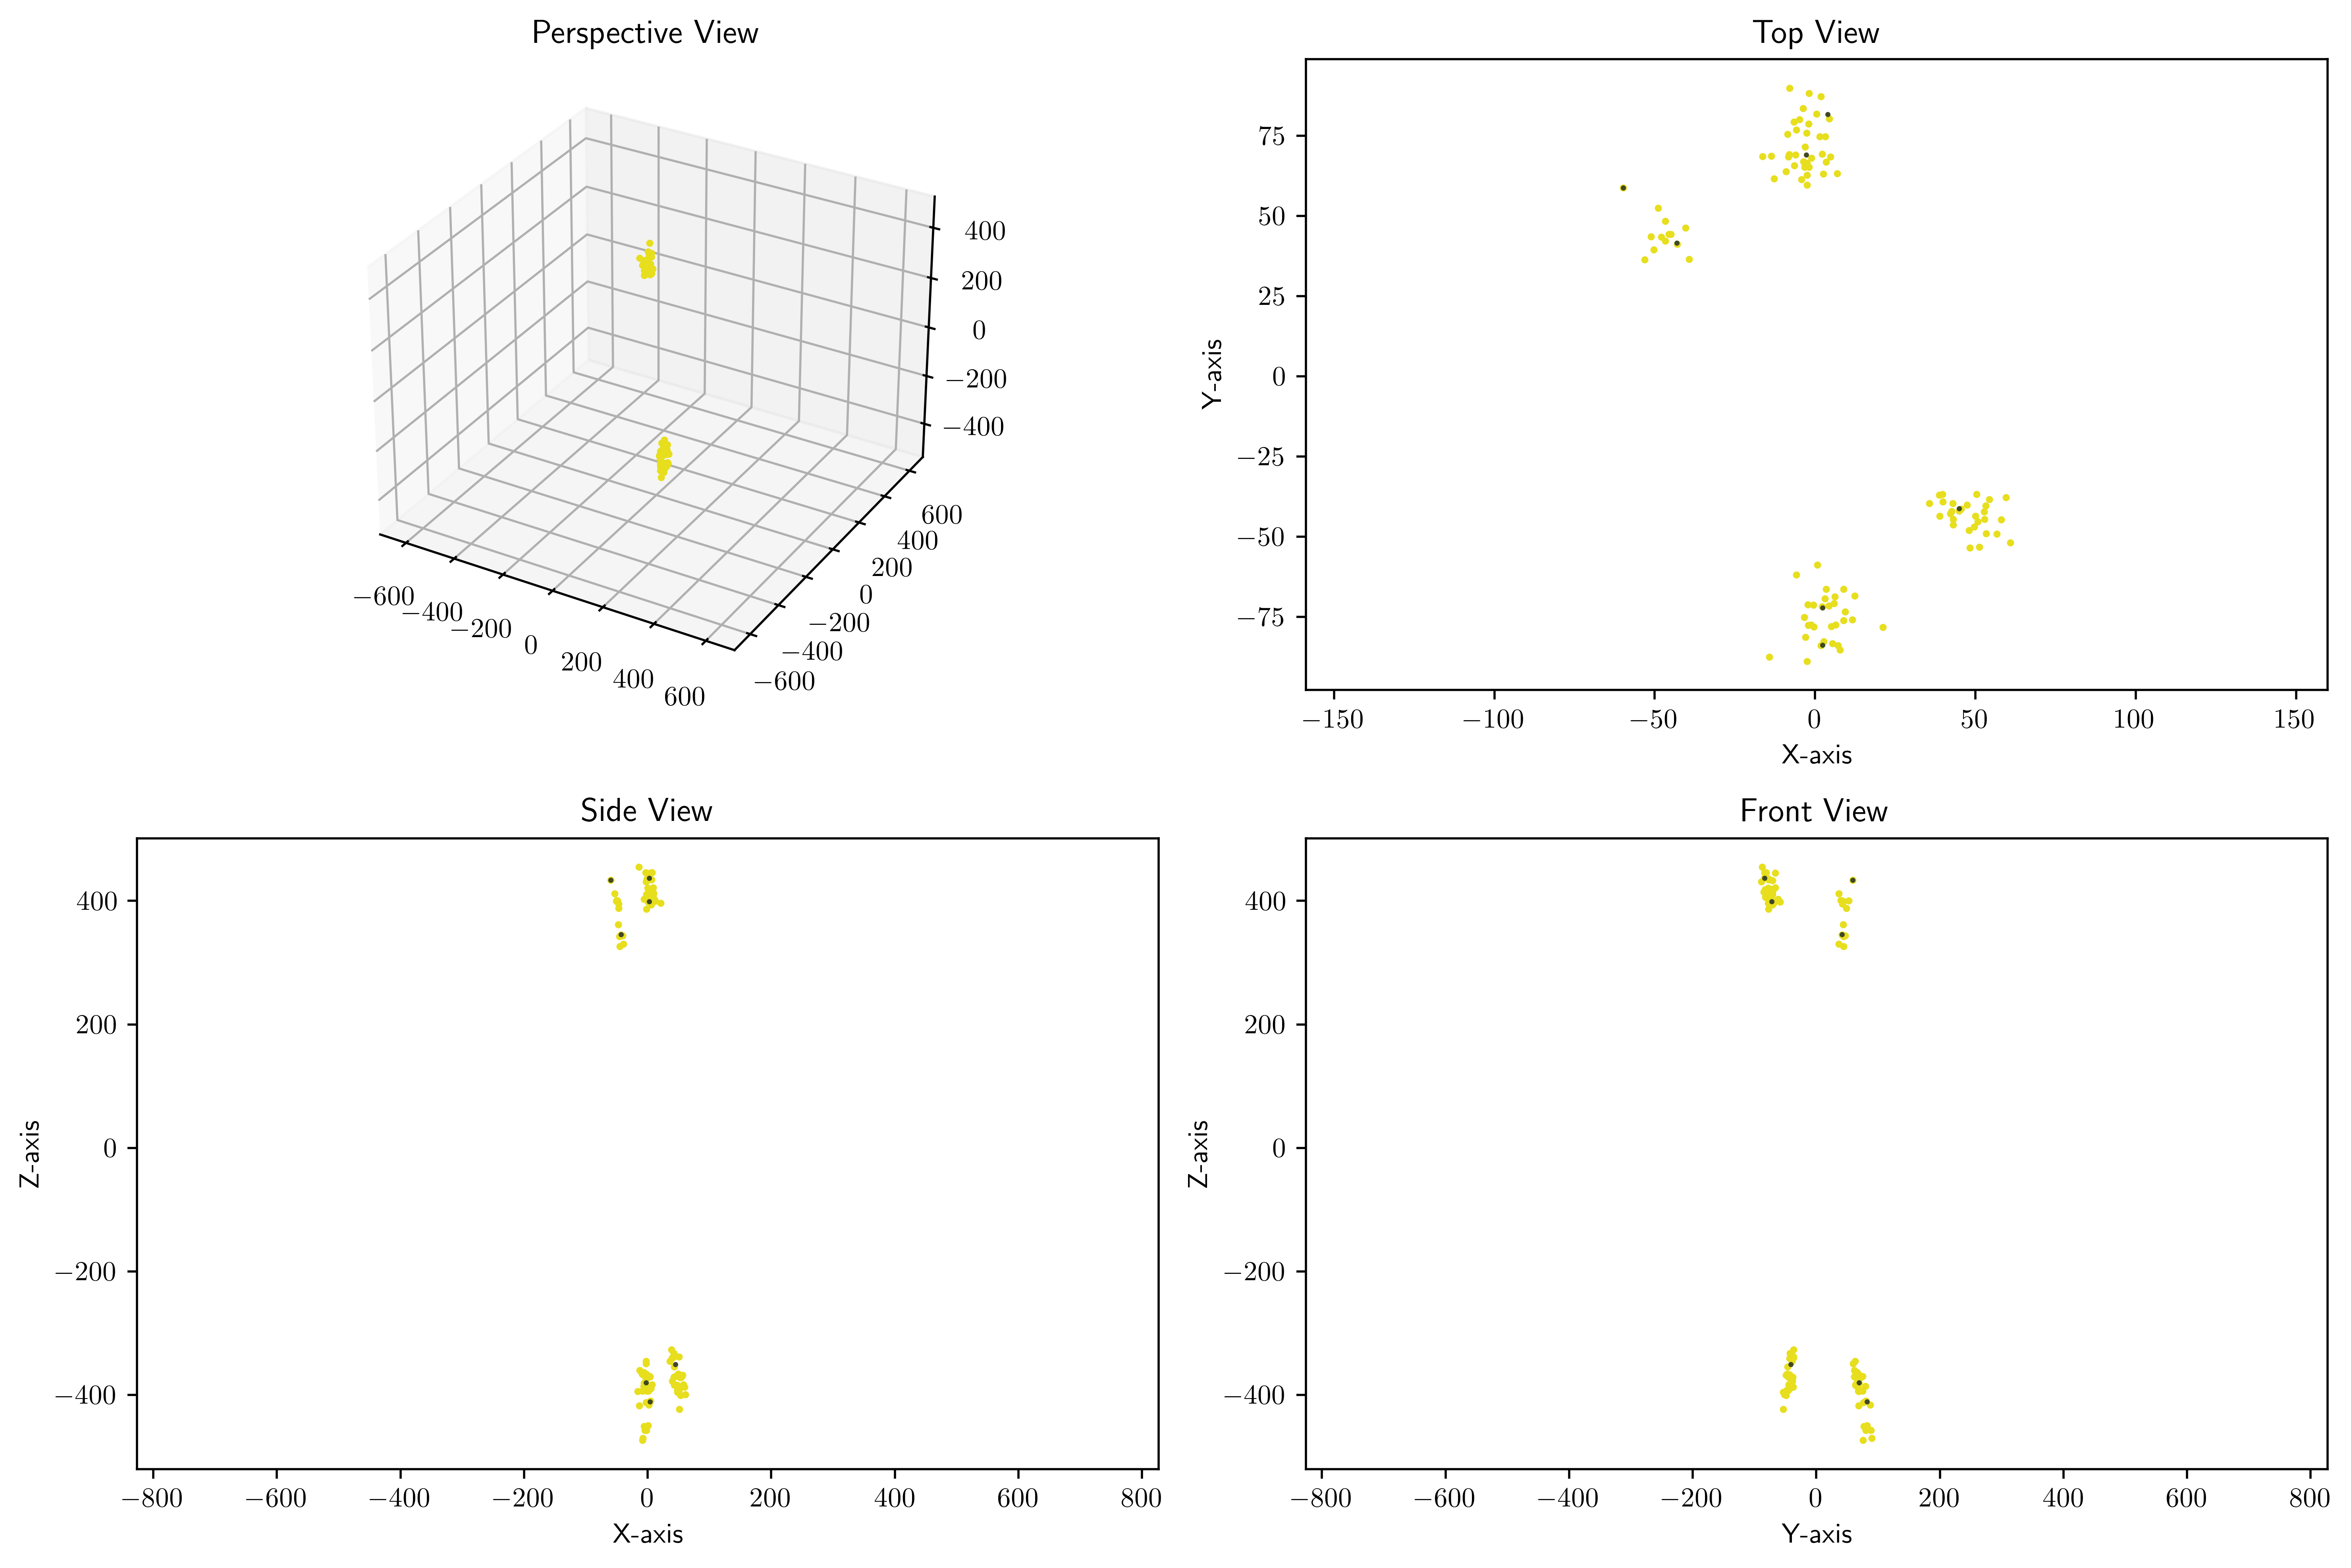

In [20]:
fig = plt.figure(figsize=(12,8), dpi=500)

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for i in [5]:
  col = np.random.rand(3)
  col[2] *= 0.2  # Adjusting the blue channel
  #scatter3D(ak.flatten(bxM[i],axis=0), ak.flatten(bxM[i], axis=0), ak.flatten(bzM[i], axis=0), ax, color=col)
  col2 = np.random.rand(3)
  col2[2] *= 0.2  # Adjusting the blue channel
  te_cut = tErr[i] > -0.5
  plot_point_cloud(ak.flatten(bx[i],axis=0), ak.flatten(by[i], axis=0), ak.flatten(bz[i], axis=0), ax1, ax2, ax3, ax4,s =10, color=col, alpha=1,prefix="tracksters")
  plot_point_cloud(ak.flatten(bxM[i][te_cut],axis=0), ak.flatten(byM[i][te_cut], axis=0), ak.flatten(bzM[i][te_cut], axis=0), ax1, ax2, ax3, ax4,s =3, color=col2, alpha=1,prefix="tracksters")
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

for i, si in enumerate(simToReco_index[:5]):
  col = np.random.rand(3)
  col[2] *= 0.2  # Adjusting the blue channel
  si = ak.flatten(si)
  plot_point_cloud(bx[i][si], by[i][si], bz[i][si], ax1, ax2, ax3, ax4,s =10, color=col, alpha=1,prefix="tracksters")
plt.tight_layout()
plt.show()

In [ ]:
  ticlv5_ncandidates = ak.count(candidate_pdgId, axis=1) / ak.count(SC_trackIdx, axis=1)
  plt.figure(figsize=(10, 8))
  # plt.xlim(-100, 6500)
  myhist(ak.count(candidate_pdgId, axis=1) / ak.count(SC_trackIdx, axis=1), title= "Candidate raw energy", xlabel="# cand / # SC", ylabel = "Counts / bin", bins = 45, label="ticlv4", range=(0,45))
  myhist(ticlv5_ncandidates, title= "Number of candidates / number of SimTracksters from SC", xlabel="\# cand / \# SC", ylabel = "Counts / bin", bins = 45, color="red", alpha=0.5, label="ticlv5", range=(0,45))
  plt.legend(fontsize=18)
  plt.grid()
  plt.show()

In [ ]:
#make_canvas()
fig = plt.figure(figsize=(12,8), dpi=500)
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
#simtrackstersCP
simCP_bx = simtrackstersCP["barycenter_x"].array()
simCP_by = simtrackstersCP["barycenter_y"].array()
simCP_bz = simtrackstersCP["barycenter_z"].array()
#simtracstersSC
simSC_bx = simtrackstersSC["barycenter_x"].array()
simSC_by = simtrackstersSC["barycenter_y"].array()
simSC_bz = simtrackstersSC["barycenter_z"].array()

# Plotting only the firs n events
n= 3

for i in range(2,n):
  print(f"CP_bx[{i}]: {CP_bx[i]}")
  print(f"SC_bx[{i}]: {SC_bx[i]}")
  col = np.random.rand(3)
  col[2] *= 0.2 # Adjusting the blue channel
  
  col2 = np.random.rand(3)
  #col2[2] *= 0.2
  
  plot_point_cloud(ak.flatten(CP_bx[i], axis=0), ak.flatten(CP_by[i], axis=0), ak.flatten(CP_bz[i], axis=0), ax1, ax2, ax3, ax4, s=8, color=col)
  plot_point_cloud(ak.flatten(SC_bx[i], axis=0), ak.flatten(SC_by[i], axis=0), ak.flatten(SC_bz[i], axis=0), ax1, ax2, ax3, ax4, s=4, color=col2)
plt.show()

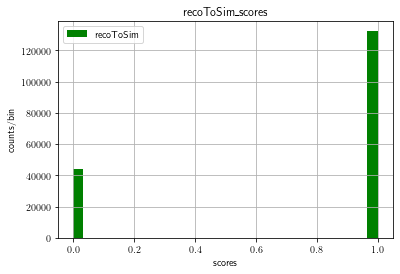

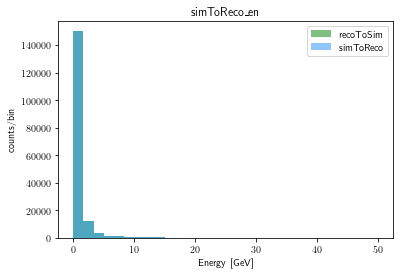

[[33.8, 0, 0, 0], [41, 0, 0, 0], [29, 0, ... 0, 0], [1.06, 0, 0, 0], [1.71, 0, 0, 0]]
[[4.63, 2.74, 2.37, 1.83, 1.76, 1.71, 1.51, 1.19, 0.867, ... 0, 0, 0, 0, 0, 0, 0, 0]]
1.0


In [25]:
myhist(ak.flatten(recoToSim_score, axis=None), title="recoToSim_scores", xlabel="scores", ylabel="counts/bin", bins=30, color='green', label="recoToSim", range=(0,1))
#myhist(ak.flatten(simToReco_score, axis=None), title="simToReco_score", xlabel="scores", ylabel="counts/bin", bins=30, label="simToReco", range=(0,1))
plt.legend(fontsize=10)
plt.show()
plt.clf()
myhist(ak.flatten(recoToSim_en, axis=None), title="recoToSim_en", xlabel="Energy [GeV]", ylabel="counts/bin", bins=30, color='green', label="recoToSim", range=(0,50), alpha=0.5)
myhist(ak.flatten(simToReco_en, axis=None), title="simToReco_en", xlabel="Energy [GeV]", ylabel="counts/bin", bins=30, label="simToReco", range=(0,50), alpha=0.5)
plt.legend(fontsize=10)

plt.show()
print(recoToSim_en[0])
print(simToReco_en[0])
print(ak.max(recoToSim_score))

In [ ]:
max_score_s2r = 0.35
min_energy_s2r = 0.5
isPassScore = ((simToReco_score < max_score_s2r) &  (simToReco_en > min_energy_s2r))
print(f"isPassScore: {isPassScore}")
isPass_s2r = ak.flatten(ak.any(isPassScore, axis=2), axis=None)
print(f"isPass_s2r: {isPassScore}")
print(f"simToReco_score[isPassScore]: {simToReco_score[isPassScore]}")
CP_raw_en = simtrackstersCP["raw_energy"].array()
min_energy_s = 0.1
isPass_s = ak.flatten(CP_raw_en > min_energy_s, axis=None)


isPass = isPass_s2r & isPass_s
total_simToReco_tracksters = ak.count_nonzero(simToReco_score)
passed_simToReco_tracksters = ak.count_nonzero(simToReco_score[isPassScore])
passed_simToReco_candidates = ak.count_nonzero(isPass_s2r)

print(f"total_simToReco_tracksters: {total_simToReco_tracksters}")
print(f"passed_simToReco_tracksters: {passed_simToReco_tracksters}")
print(f"passed_simToReco_candidates: {passed_simToReco_candidates}")

energy_ratio= ak.sum(simToReco_en[isPassScore][isPass], axis=1)/CP_raw_en[isPass]


In [ ]:
myhist(energy_ratio, title="Energy ratio", xlabel=r"ratio $E_{RECO}/E_{Sim}$", ylabel="counts/bin",bins=30, label="", range=(0,1))

## Mergetrackters voxels



``` diff
- We have to define all the input maps by tracksterMerged instead of by event.

```

In [ ]:
print(f"etaM: {betaM}")
print(f"phiM: {bphiM}")
brM= np.sqrt(bxM**2+byM**2+bzM**2)
print(f"rM: {brM}")


In [ ]:
clx = clusters["position_x"].array()
cly = clusters["position_y"].array()
clz = clusters["position_z"].array()
cleta = clusters["position_eta"].array()
clphi = clusters["position_phi"].array()
clr = np.sqrt(clx**2+cly**2)

print(clusters.keys())

print(f"ak.min(clz): {ak.min(clz)}")
print(f"ak.max(clz): {ak.max(clz)}")
print(f"ak.min(clphi): {ak.min(clphi)}")
print(f"ak.max(clphi): {ak.max(clphi)}")
print(f"ak.min(cleta[cleta >0]): {ak.min(cleta[cleta>0])}")
print(f"ak.max(cleta): {ak.max(cleta)}")

myhist(ak.flatten(clz, axis=None), title="Clusters z-position", xlabel="z [cm]", ylabel="counts/bin", bins=300, label="", range=(300, 550))
plt.show()
plt.clf()
myhist(ak.flatten(cleta, axis=None), title="Clusters eta-direction (negatives)", xlabel="eta", ylabel="counts/bin",bins=300, label="",range=(-3.,-2.9))
plt.show()
plt.clf()
myhist(ak.flatten(cleta, axis=None), title="Clusters eta=direction", xlabel="eta", ylabel="counts/bin", bins=100, label="", range=(1.35, 3.15))
plt.show()
myhist(ak.flatten(clphi, axis=None), title="Clusters phi-direction", xlabel="phi", ylabel="counts/bin",bins=100, label="",range=(-3.15,3.15))
plt.show()
plt.clf()

In [ ]:
tracksters.keys()

In [ ]:


#features_perTracksterMerged 
ftm= ak.ArrayBuilder()

for i in range(len(betaM)):
  betaM_mean = np.mean(betaM[i])
  bphiM_mean = np.mean(bphiM[i])
  bzM_mean = np.mean(bzM[i])
  
  delta_eta= betaM[i]- betaM_mean
  delta_phi= bphiM[i]- bphiM_mean
  delta_z = bzM[i] - bzM_mean

  ftm.append(np.array([np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8])[0],
    np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8], weights =np.asarray(reg_enM[i]))[0]]))
  
ftm = ftm.snapshot()
form, length, container = ak.to_buffers(ftm)
print(container.keys())


with open('grid_array.pkl', 'wb') as f:
  pickle.dump(ftm,f)
#ak.#save("grid.h5", ftm, mode="w")


'''
# Using track as center of the grid
for i, i_eta in enumerate(track_hgcal_eta):
  if len(i_eta)>0 and len(track_hgcal_phi[i])>0 and len(track_hgcal_z)>0:
    #print(f"delta_eta[{i}]: {etaM[i]}")
    #print(f"i_eta: {i_eta}")
    #print(f"delta_eta[{i}]- i_eta: {etaM[i]-i_eta[0]}")
    delta_eta.append(betaM[i]- i_eta[0])
    delta_phi.append(bphiM[i]- track_hgcal_phi[i][0])
    delta_z.append(bzM[i] - track_hgcal_z[i][0])
    #print(reg_enM[i])
    #print(type(reg_enM[i]))
    ftm.append(np.array([np.histogramdd(np.transpose(np.array([betaM[i]- i_eta[0], 
                                                     bphiM[i]- track_hgcal_phi[i][0], 
                                                     bzM[i] - track_hgcal_z[i][0]])), 
                              bins=[8,8,8])[0],
                         np.histogramdd(np.transpose(np.array([betaM[i]- i_eta[0], 
                                                     bphiM[i]- track_hgcal_phi[i][0], 
                                                     bzM[i] - track_hgcal_z[i][0]])), 
                              bins=[8,8,8], weights =np.asarray(reg_enM[i]))[0]]))
ftm = ftm.snapshot()


delta_eta = delta_eta.snapshot()
delta_phi = delta_phi.snapshot()
delta_z = delta_z.snapshot()
ak.max(delta_eta)
ak.max(delta_phi)
np.remainder(ak.max(delta_phi), np.pi)
ak.max(delta_z)

print(ftm.type)
'''
print(ftm.type)
print(ak.max(betaM))
print(ak.min(betaM))
print(ak.min(np.abs(betaM)))

print(np.histogramdd(np.transpose(np.array([delta_eta, delta_phi, delta_z])), bins=[8,8,8])[1])


In [ ]:
with open('grid_array.pkl', 'rb') as f:
  ftm_test = pickle.load(f)

print(ftm_test.type)

In [ ]:
myhist(ak.flatten(delta_eta,axis=None), title="Delta eta", xlabel="eta_trackster - eta_track_hgcal", bins=40, range=(0,1.))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=40, range=(0,6.3))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=40, range=(0,1.))
plt.show()
myhist(ak.flatten(delta_z, axis=None), title= "Delta z", xlabel="z_trackster- phi_track_hgcal", bins = 400 , range= (0, 200.))
plt.show()

In [ ]:
myhist(ak.flatten(delta_eta,axis=None), title="Delta eta", xlabel="eta_trackster - eta_track_hgcal", bins=8, range=(0,0.5))
plt.show()
myhist(ak.flatten(delta_phi,axis=None), title="Delta phi", xlabel="phi_trackster - phi_track_hgcal", bins=8, range=(0,0.7))
plt.show()
myhist(ak.flatten(delta_z, axis=None), title= "Delta z", xlabel="z_trackster- phi_track_hgcal", bins = 8 , range= (0, 200.))
plt.show()

In [ ]:
#print(delta_phi[0])
#np.histogramdd(np.array([delta_phi[0], delta_eta[0], delta_z[0]]), bins=[8,8,8])[0]

#features_perTracksterMerged 
ftm= ak.ArrayBuilder()
for i in range(1):
  if len(track_hgcal_eta[i])>0 and len(track_hgcal_phi[i])>0 and len(track_hgcal_z)>0:

    ftm.append(np.histogramdd(np.transpose(np.array([delta_phi[i], delta_eta[i], delta_z[i]])), bins=[8,8,8])[0])
    hist, binedges = np.histogramdd(np.transpose(np.array([delta_phi[i], delta_eta[i], delta_z[i]])), bins=[8,8,8])
    # Setup a 3D figure and add plot points
    fig = plt.figure(figsize=(12,12), dpi=200)
    #plot_multilayers()
   
    
    print(f"ak.min(delta_eta[i]): {ak.min(delta_eta[i])}")
    print(f"ak.max(delta_eta[i]): {ak.max(delta_eta[i])}")
    print(f"ak.min(delta_phi[i]): {ak.min(delta_phi[i])}")
    print(f"ak.max(delta_phi[i]): {ak.max(delta_phi[i])}")
    
    print(f"ak.min(delta_z[i]): {ak.min(delta_z[i])}")
    print(f"ak.max(delta_z[i]): {ak.max(delta_z[i])}")

    
    
    
    '''
    print(delta_phi[i])
    print(delta_eta[i])
    print(delta_z[i])
    
    print(len(delta_phi[i]))
    print(len(delta_eta[i]))
    print(len(delta_z[i]))
    hist2d = np.histogram2d(delta_phi[i], delta_eta[i], bins=8)[0]
    myhist2d(delta_phi[i], delta_eta[i], bins=8, weights=reg_enM[i], title='Regressed energy/bin', xlabel='delta_phi', ylabel='delta_eta')
    plt.colorbar()
    plt.show()
    myhist2d(delta_phi[i], delta_eta[i], bins=8, title='Counts/bin', xlabel='delta_phi', ylabel='delta_eta')
    plt.colorbar()
    plt.show()
    '''
#ftm = ftm.snapshot()
#print(ftm.type)
    
 

## Definition of the Truth

 - HOw are we going to define completeness. Is it by the level of coincidence of the truth and the input features?

In [ ]:
max_score_r2s = 0.35
min_energy_r2s = 0.5
max_score_s2r = 0.35
min_energy_s2r = 0.5
cond_r2s = ((recoToSim_score < max_score_r2s) & (recoToSim_en > min_energy_r2s))
# We can flatten in the following line because we are not looking the link one by one of the simTracksters
# and the tracksters, we are going to select the simTracksters that are linked to any trackster and make the map for the truth
isPass_r2s = ak.flatten(ak.any(cond_r2s, axis=2), axis=None)

cond_s2r = ((simToReco_score < max_score_s2r) & (simToReco_en > min_energy_s2r))
isPass_s2r = ak.flatten(cond_r2s, axis=None)
#isPass_s2r = ak.flatten(ak.any(cond_r2s, axis=1), axis=None)
'''
print(cond_s2r.type)
print(cond_s2r)
print((ak.flatten(cond_s2r, axis=0)).type)
print((ak.flatten(cond_s2r, axis=0)))
print((ak.flatten(cond_s2r, axis=1)).type)
print((ak.flatten(cond_s2r, axis=1)))
print((ak.flatten(cond_s2r, axis=2)).type)
print((ak.flatten(cond_s2r, axis=2)))
'''
print(cond_r2s)
print(ak.any(cond_r2s, axis=1).type)
print(isPass_s2r)
print(isPass_s2r.type)


 - To define completeness we see in the association recoToSim which are the reco tracksters associated with the correct sim trackster, what are the reco tracksters incorrectly assigned to the a simTrackster
 

In [ ]:
TICLCandidate.keys()


In [ ]:
print(len(ak.flatten(TICLCandidate["tracksters_in_candidate"].array(), axis=None)))

In [ ]:
f1 = ak.from_parquet("fTsM_1D.parquet")

In [ ]:
print(f1.type)

In [ ]:
print(f1[0])